In [1]:
import os
import glob
import pandas as pd
import ipywidgets as widgets
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.collections import LineCollection
import matplotlib.pyplot as plt
from mesa_reader import MesaData
import numpy as np
from IPython.display import display
from IPython.display import clear_output
from ipywidgets import interact
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


In [2]:

plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False
fs = 24

# update various fontsizes to match
params = {'figure.figsize': (12, 8),
          'legend.fontsize': 0.7*fs,
          'axes.labelsize': 1.1*fs,
          'axes.titlesize': 0.8*fs,
          'xtick.labelsize': 0.6 * fs,
          'ytick.labelsize': 0.6 * fs,
          'axes.linewidth': 1.1,
          'lines.linestyle':"--",
          'xtick.major.size': 7,
          'xtick.minor.size': 4,
          'ytick.major.size': 7,
          'ytick.minor.size': 4}
plt.rcParams.update(params)


In [3]:
# Define the directory path where the files are located
directory_path=[]

#directory_path.append( '/userdata/data/bhat/D6/KavliSP23/Test_Ni_Opacity/Long_Evolve_Ni_opacity_massloss/LOGS_burning_normal_1,2_approx21/')
directory_path.append( '/userdata/data/bhat/D6/D6_MESA/Test_Ni_entropy_10^8_finalmodels/LOGS_final_011_approx21_normal_2.0timesni56_0,01s_withoutmassloss/')
directory_path.append( '/userdata/data/bhat/D6/D6_MESA/Test_Ni_entropy_10^8_finalmodels/LOGS_final_095_approx21_normal_2.0timesni56_0,01s_withoutmassloss/')
directory_path.append( '/userdata/data/bhat/D6/D6_MESA/Test_Ni_entropy_10^8_finalmodels/LOGS_final_085_approx21_normal_2.0timesni56_0,01s_withoutmassloss/')
directory_path.append( '/userdata/data/bhat/D6/D6_MESA/Test_Ni_entropy_10^8_finalmodels/LOGS_final_064_approx21_normal_2.0timesni56_0,01s_withoutmassloss/')
#directory_path.append( '/userdata/data/bhat/D6/KavliSP23/Test_Ni_entropy/LOGS_10^7_064_approx21_normal_1.5timesni56_HELM/')
directory_path.append( '/userdata/data/bhat/D6/D6_MESA/Test_Ni_entropy_10^8_finalmodels/LOGS_final_050_approx21_normal_2.0timesni56_0,01s_withoutmassloss/')


# HEre I plot the difference in HR diagram 

1.1
0.95
0.85
0.64
0.5


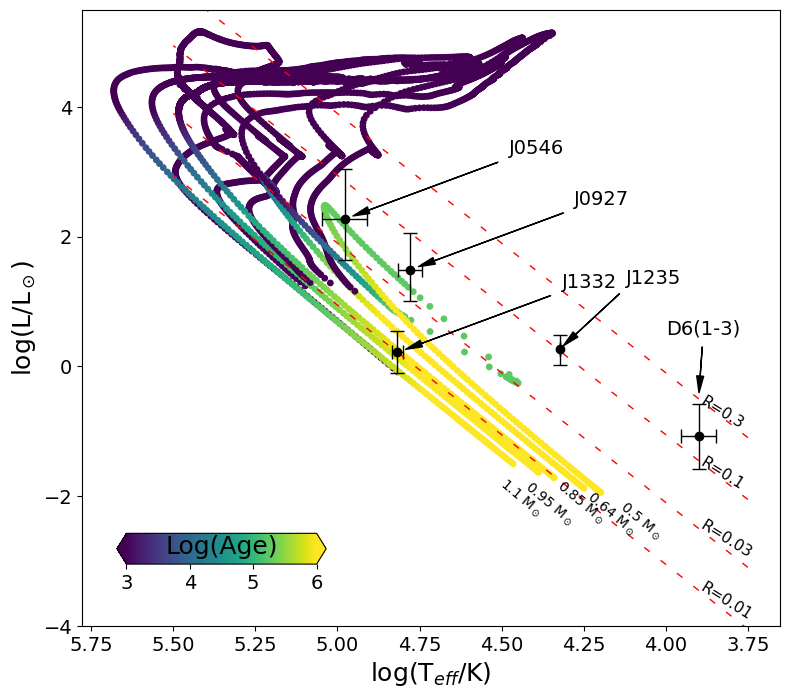

In [4]:
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

i=0
plt.style.use('default')
#plt.style.use('dark_background')
fig=plt.figure(figsize=(9,8))
plt.rcParams["font.size"]=14
plt.rcParams["axes.labelsize"]=18

gs = gridspec.GridSpec(1, 1)
ax0 = plt.subplot(gs[0,0])
r=[0.01,0.03,0.1,0.3]
logt=np.linspace(3.75,5.5,20)
colors=('m','g','b','r')
plt.rcParams["lines.linestyle"]="--"
plt.rcParams["lines.linewidth"]=1
for directory in directory_path:
    h = MesaData(os.path.join(directory, 'history.data'))
    mass=h.star_mass[0]
    print(mass)
#h2 = MesaData(os.path.join(directory_path6, 'history.data'))
#h2 = MesaData(os.path.join(directory_path6, 'history.data'))
    plot1=plt.scatter(h.log_Teff, h.log_L,c=np.log10(h.star_age),vmin=3,vmax=6,cmap='viridis',s=15)
    
    if (i>=2 and i<4):
        plt.annotate("{0:.2g} M$_\odot$".format(mass),(h.log_Teff[-1],h.log_L[-1]-0.7),rotation=-40,fontsize=10)
    elif i==4:
        plt.annotate("{0:.2g} M$_\odot$".format(mass),(h.log_Teff[-1]-0.05,h.log_L[-1]-0.7),rotation=-40,fontsize=10)

    else: 
        plt.annotate("{0:.2g} M$_\odot$".format(mass),(h.log_Teff[-1]+0.05,h.log_L[-1]-0.8),rotation=-40,fontsize=10)
    i=i+1
names_d6=np.array(["J1235","J0927", "J0546", "J1332"])#J1235, J0927, J0546, J1332

radii_d6=np.array([0.104,0.052,0.051,0.010])#J1235, J0927, J0546, J1332
radii_d6_error_plus=np.array([0.026,0.025,0.029,0.003])#0.021
radii_d6_error_minus=np.array([0.030,0.020,0.021,0.003])
temp_d6=np.array([21000,60000,95000,65657])
temp_d6_error=np.array([0,5000,15000,2390])
L_D6=np.square(radii_d6)*(temp_d6/5800)**4
L_D6_error_plus=2*radii_d6_error_plus/radii_d6 + 4*temp_d6_error/temp_d6
L_D6_error_minus=2*radii_d6_error_minus/radii_d6 + 4*temp_d6_error/temp_d6


for i in range(4):
    plt.errorbar(np.log10(temp_d6[i]),np.log10(L_D6[i]),xerr=temp_d6_error[i]/(np.log(10)*temp_d6[i]),yerr=([L_D6_error_minus[i]/(np.log(10))],[L_D6_error_plus[i]/(np.log(10))]),
                 marker='o',capsize=5,c='black')#


plt.errorbar(3.9,-1.08,xerr=(0.125/np.log(10)),yerr=([1.16/np.log(10)],[1.16/np.log(10)]),marker='o',capsize=5,c='black') #1-sigma with 8kpm1k Teff and 0.15pm0.05 radius
plt.gca().invert_xaxis()
#plt.legend(['0.95','0.85','0.64','J1235','J0927','J0546','J1332','D6(1-3)'],loc="upper right",bbox_to_anchor=(1.0,0.9),fontsize=10)
plt.xlabel('log(T$_{eff}$/K)')
plt.ylabel('log(L/L$_\odot$)')
for i in range(len(r)):
    logl=2*np.log10(r[i])+4*logt-4*np.log10(5800)
    plt.plot(logt,logl,linestyle=(0,(5,10)),linewidth=1,color='r')
    plt.annotate("R={}".format(r[i]),(logt[1]+0.06,logl[1]-0.22),rotation=-32,fontsize=11)
plt.annotate('J0546', xy=(np.log10(temp_d6[2]), np.log10(L_D6[2])), xytext=(np.log10(temp_d6[2])-0.5, np.log10(L_D6[2])+1),
            arrowprops=dict(facecolor='black', shrink=0.05,width=0.001,headwidth=5)
            )
plt.annotate('J1332', xy=(np.log10(temp_d6[3]), np.log10(L_D6[3])), xytext=(np.log10(temp_d6[3])-0.5, np.log10(L_D6[3])+1),
            arrowprops=dict(facecolor='black', shrink=0.05,width=0.001,headwidth=5)
            )
plt.annotate('J0927', xy=(np.log10(temp_d6[1]), np.log10(L_D6[1])), xytext=(np.log10(temp_d6[1])-0.5, np.log10(L_D6[1])+1),
            arrowprops=dict(facecolor='black', shrink=0.05,width=0.001,headwidth=5)
            )
plt.annotate('J1235', xy=(np.log10(temp_d6[0]), np.log10(L_D6[0])), xytext=(np.log10(temp_d6[0])-0.2, np.log10(L_D6[0])+1),
            arrowprops=dict(facecolor='black', shrink=0.05,width=0.001,headwidth=5)
            )
plt.annotate('D6(1-3)', xy=(3.9,-0.5), xytext=(4.0,0.5),
            arrowprops=dict(facecolor='black', shrink=0.1,width=0.001,headwidth=5)
            )
cbaxes = plt.gca().inset_axes( (0.05,0.1,0.3,0.05)) 
colorbar=plt.colorbar(plot1,extend='both',orientation='horizontal',cax=cbaxes)
colorbar.set_label(label='Log(Age)',labelpad=-42,fontsize=18)  # Adjust the value of 'labelpad' as needed
plt.ylim(-4,5.5)
plt.savefig("../../../D6_MESA/Plots/plots_paper/HR_grid1.pdf",bbox_inches='tight')
plt.savefig("../../../D6_MESA/Plots/plots_paper/HR_grid1.png")

# HR withour hEating


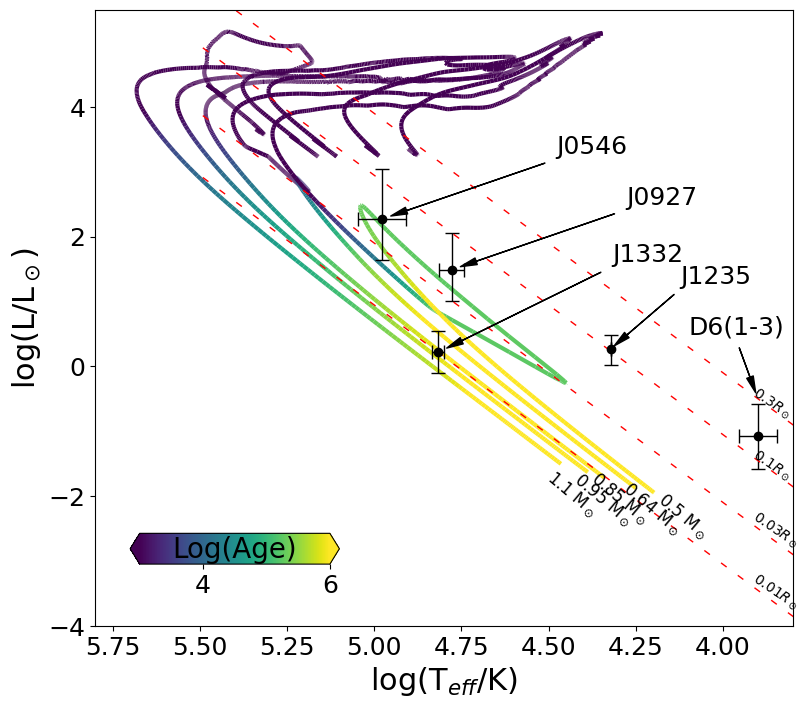

In [9]:
i=0
fig,ax=plt.subplots(figsize=(9,8))
plt.rcParams["font.size"]=18
plt.rcParams["axes.labelsize"]=22
#gs = gridspec.GridSpec(1, 1)
#ax0 = plt.subplot(gs[0,0])
for directory in directory_path:
    h = MesaData(os.path.join(directory, 'history.data'))
    mass=h.star_mass[0]
    mask=h.star_age>=3.2e-10
    points = np.array([h.log_Teff[mask], h.log_L[mask]]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    lc = LineCollection(segments, cmap='viridis')
    lc.set_array(np.log10(h.star_age[mask]))

    lc.set_linewidth(3)
    line = ax.add_collection(lc)
    lc.set(clim=(3,6))
    #plot1=plt.scatter(h.log_Teff[mask], h.log_L[mask],c=np.log10(h.star_age[mask]),vmin=4.0,vmax=6.0,cmap='viridis',s=15)
    
    if (i>=2 and i<4):
        plt.annotate("{0:.2g} M$_\odot$".format(mass),(h.log_Teff[-1]+0.05,h.log_L[-1]-0.7),rotation=-40,fontsize=12)
    elif i==4:
        plt.annotate("{0:.2g} M$_\odot$".format(mass),(h.log_Teff[-1],h.log_L[-1]-0.7),rotation=-40,fontsize=12)

    else: 
        plt.annotate("{0:.2g} M$_\odot$".format(mass),(h.log_Teff[-1]+0.05,h.log_L[-1]-0.8),rotation=-40,fontsize=12)
    i=i+1


for i in range(4):
    plt.errorbar(np.log10(temp_d6[i]),np.log10(L_D6[i]),xerr=temp_d6_error[i]/(np.log(10)*temp_d6[i]),yerr=([L_D6_error_minus[i]/(np.log(10))],[L_D6_error_plus[i]/(np.log(10))]),
                 marker='o',capsize=5,c='black')#


plt.errorbar(3.9,-1.08,xerr=(0.125/np.log(10)),yerr=([1.16/np.log(10)],[1.16/np.log(10)]),marker='o',capsize=5,c='black') #1-sigma with 8kpm1k Teff and 0.15pm0.05 radius
plt.xlim(3.8,5.8)

plt.gca().invert_xaxis()

for i in range(len(r)):
    logl=2*np.log10(r[i])+4*logt-4*np.log10(5800)
    plt.plot(logt,logl,linestyle=(0,(5,10)),linewidth=1,color='r')
    plt.annotate("{}$R_\odot$".format(r[i]),(logt[1]+0.08,logl[1]-0.05),rotation=-34,fontsize=10)
plt.annotate('J0546', xy=(np.log10(temp_d6[2]), np.log10(L_D6[2])), xytext=(np.log10(temp_d6[2])-0.5, np.log10(L_D6[2])+1),
            arrowprops=dict(facecolor='black', shrink=0.05,width=0.001,headwidth=5)
            )
plt.annotate('J1332', xy=(np.log10(temp_d6[3]), np.log10(L_D6[3])), xytext=(np.log10(temp_d6[3])-0.5, np.log10(L_D6[3])+1.4),
            arrowprops=dict(facecolor='black', shrink=0.05,width=0.001,headwidth=5)
            )
plt.annotate('J0927', xy=(np.log10(temp_d6[1]), np.log10(L_D6[1])), xytext=(np.log10(temp_d6[1])-0.5, np.log10(L_D6[1])+1),
            arrowprops=dict(facecolor='black', shrink=0.05,width=0.001,headwidth=5)
            )
plt.annotate('J1235', xy=(np.log10(temp_d6[0]), np.log10(L_D6[0])), xytext=(np.log10(temp_d6[0])-0.2, np.log10(L_D6[0])+1),
            arrowprops=dict(facecolor='black', shrink=0.05,width=0.001,headwidth=5)
            )
plt.annotate('D6(1-3)', xy=(3.9,-0.5), xytext=(4.1,0.5),
            arrowprops=dict(facecolor='black', shrink=0.1,width=0.001,headwidth=5)
            )
cbaxes = plt.gca().inset_axes( (0.05,0.1,0.3,0.05)) 
colorbar=fig.colorbar(line,ax=ax,extend='both',orientation='horizontal',cax=cbaxes)
#colorbar=plt.colorbar(plot1,extend='both',orientation='horizontal',cax=cbaxes)
colorbar.set_label(label='Log(Age)',labelpad=-45,fontsize=20)  # Adjust the value of 'labelpad' as needed
plt.ylim(-4,5.5)
plt.xlabel('log(T$_{eff}$/K)')
plt.ylabel('log(L/L$_\odot$)')
plt.savefig("../../../D6_MESA/Plots/plots_paper/HR_grid1.pdf",bbox_inches='tight')
plt.savefig("../../../D6_MESA/Plots/plots_paper/HR_grid1.png")

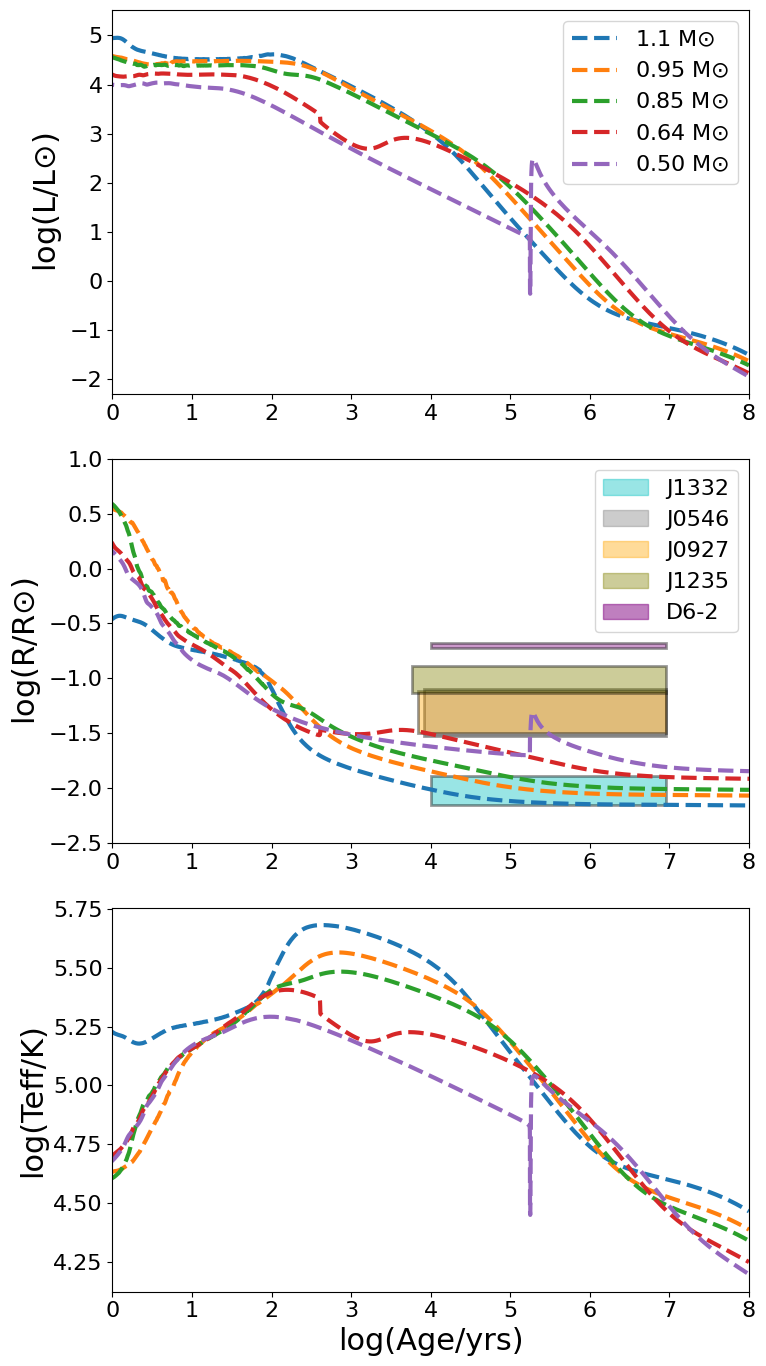

In [11]:
import matplotlib.patches as mpatches
plt.rc('ytick',labelsize=16)
plt.rcParams["lines.linewidth"]=3
plt.rc('xtick',labelsize=16)

figs, axs=plt.subplots(3,1,figsize=(8,14))
colors=['olive','orange','grey','c','purple'] 
handle=[] 
for i in range(4):
    axs[1].axhspan(xmin=(0.5-i/100),xmax=0.87,ymin=np.log10(radii_d6[3-i]-radii_d6_error_minus[3-i]),ymax=np.log10(radii_d6[3-i]+radii_d6_error_plus[3-i]),alpha=(0.4),
                   lw=2,ec='k',color=colors[3-i])
    labels_legend = mpatches.Patch(color=colors[3-i], label=names_d6[3-i],alpha=0.4) 
    handle.append(labels_legend)

axs[1].axhspan(xmin=0.5,xmax=0.87,ymin=np.log10(0.19),ymax=np.log10(0.21),alpha=(0.4),
                   lw=2,ec='k',color=colors[4])
labels_legend = mpatches.Patch(color=colors[4], label="D6-2",alpha=0.5) 
handle.append(labels_legend)

axs[1].legend(handles=handle,fontsize=16)
#axs[1].legend() 
for i in range(1):
    for directory in directory_path:
        h = MesaData(os.path.join(directory, 'history.data'))
        axs[i].plot(np.log10(h.star_age), h.log_L)
        axs[i].set_ylabel("log(L/L$\odot$)",fontsize=22)
        axs[i+1].plot(np.log10(h.star_age), h.log_R)
        axs[i+1].set_ylabel("log(R/R$\odot$)",fontsize=22)
        axs[i+2].plot(np.log10(h.star_age), h.log_Teff)
        axs[i+2].set_ylabel("log(Teff/K)",fontsize=22)
        axs[i].set_xlim(0,8)
        axs[i+1].set_xlim(0,8)
        axs[i+2].set_xlim(0,8)
        axs[i+1].set_ylim(-2.5,1)


plt.xlabel('log(Age/yrs)',fontsize=22)
plt.tight_layout()
axs[0].legend(('1.1 M$\odot$','0.95 M$\odot$','0.85 M$\odot$','0.64 M$\odot$','0.50 M$\odot$'),fontsize=16,loc='best')
plt.savefig("../../../D6_MESA/Plots/plots_paper/LRT_grid1.pdf",bbox_inches='tight')
plt.savefig("../../../D6_MESA/Plots/plots_paper/LRT_grid1.png",bbox_inches='tight')



# Composition

In [ ]:
h2 = np.genfromtxt('/userdata/data/bhat/D6/KavliSP23/Test1/Long_Evolve/composition.dat',skip_header=1)
h = MesaData(os.path.join(directory_path, 'profile11.data'))
plt.plot(h.xq, np.log10(h.he4))
plt.plot(h.xq, np.log10(h.c12))
plt.plot(h.xq, np.log10(h.n14))
plt.plot(h.xq, np.log10(h.o16))
plt.plot(h.xq, np.log10(h.fe56))
plt.ylim(-15,0)
plt.plot(h2[:,0],np.log10(h2[:,3]))
plt.plot(h2[:,0],np.log10(h2[:,4]))
plt.plot(h2[:,0],np.log10(h2[:,5]))
plt.plot(h2[:,0],np.log10(h2[:,6]))
plt.plot(h2[:,0],np.log10(h2[:,12]))

# set axis labels
plt.legend(("he4","c12","n14","o16","fe56","he4R","c12r","n14r","o16r","fe56r"))

plt.xlabel(r'$X_q$')
plt.ylabel(r'$X_n$')

# Comparison of heated and relaxed donor model

0.64
0.64
0.64


ValueError: alpha (1.5) is outside 0-1 range

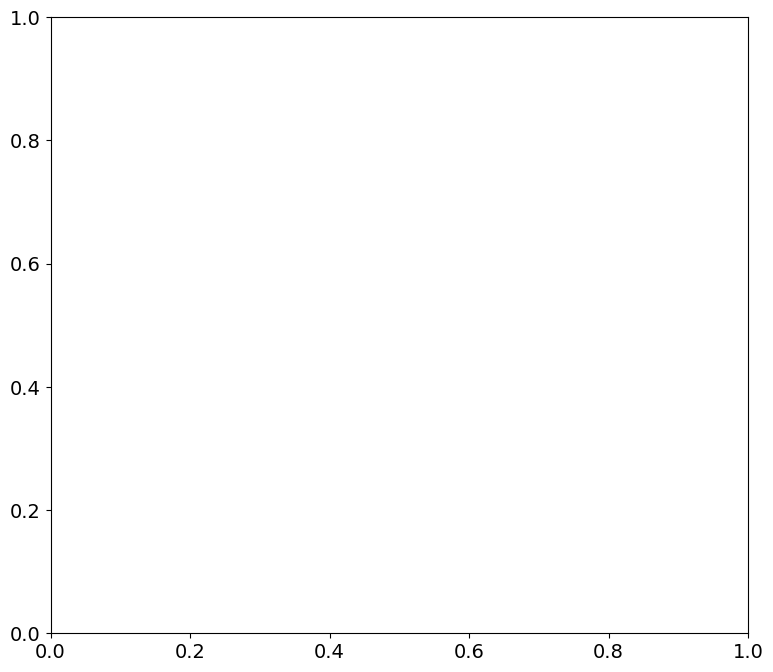

In [5]:
# Define the directory path where the files are located
directory_path=[]
directory_path.append( '/userdata/data/bhat/D6/D6_MESA/Test_Ni_entropy/LOGS_final_donor_remnant_heated_approx21_normal_2.0timesni56_nonHELM_0,01s/')
directory_path.append( '/userdata/data/bhat/D6/D6_MESA/Test_Ni_entropy/LOGS_final_relaxationsuite_064_approx21_normal_2.0timesni56_HELM/')
directory_path.append( '/userdata/data/bhat/D6/D6_MESA/Test_Ni_entropy_10^8_finalmodels_withouttail/LOGS_final_064_approx21_tail_2.0timesni56_0,01s_withoutmassloss/')


i=0
fig,ax=plt.subplots(figsize=(9,8))
plt.rcParams["xtick.labelsize"]=16
plt.rcParams["ytick.labelsize"]=16
r=[0.01,0.03,0.1,0.3]
logt=np.linspace(4.0,5.5,20)
colors=('m','g','b','r')
plt.rcParams["lines.linestyle"]="--"
plt.rcParams["lines.linewidth"]=3
for directory in directory_path:
    h = MesaData(os.path.join(directory, 'history.data'))
    mass=h.star_mass[0]
    print(mass)
    mask=h.star_age>=3.2e-10
    points = np.array([h.log_Teff[mask], h.log_L[mask]]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    lc = LineCollection(segments, cmap='viridis',alpha=i/2+0.5)
    lc.set_array(np.log10(h.star_age[mask]))

    lc.set_linewidth(3)
    line = ax.add_collection(lc)
    lc.set(clim=(3,6))
    
    if (i>=2 and i<4):
        plt.annotate("{0:.2g} M$_\odot$".format(mass),(h.log_Teff[-1],h.log_L[-1]-0.7),rotation=-40,fontsize=10)
    elif i==4:
        plt.annotate("{0:.2g} M$_\odot$".format(mass),(h.log_Teff[-1]-0.05,h.log_L[-1]-0.7),rotation=-40,fontsize=10)

    elif i==1: 
        #plot1=plt.scatter(h.log_Teff, h.log_L,c=np.log10(h.star_age),vmin=3,vmax=6,cmap='viridis',s=20,marker="o",facecolors="none",alpha=0.6)

        plt.annotate("Relaxed",(h.log_Teff[0],h.log_L[0]-0.6),rotation=-35,fontsize=22)
    elif i==0: 
        #plot1=plt.scatter(h.log_Teff, h.log_L,c=np.log10(h.star_age),vmin=3,vmax=6,cmap='viridis',s=20,marker='s',facecolors='none')

        plt.annotate("Heated",(h.log_Teff[mask][0]-0.09,h.log_L[mask][0]-1.2),rotation=-34,fontsize=22)
    i=i+1
    


plt.gca().invert_xaxis()
plt.xlabel('log(T$_{eff}$/K)',fontsize=22)
plt.ylabel('log(L/L$_\odot$)',fontsize=22)
for i in range(len(r)):
    logl=2*np.log10(r[i])+4*logt-4*np.log10(5800)
    plt.plot(logt,logl,linestyle=(0,(5,10)),linewidth=1,color='r')
    plt.annotate(r"R={}R$\odot$".format(r[i]),(logt[1]+0.1,logl[1]-0.2),rotation=-35,fontsize=14)

cbaxes = plt.gca().inset_axes( (0.05,0.1,0.3,0.05)) 
colorbar=fig.colorbar(line,ax=ax,extend='both',orientation='horizontal',cax=cbaxes,alpha=1)
colorbar.set_label(label='Log(Age)',labelpad=-47,fontsize=20)  # Adjust the value of 'labelpad' as needed
plt.ylim(-3,5)
plt.xlim(5.5,4.0)

plt.tight_layout()
#plt.savefig("../../Plots/plots_paper/default_evolution.pdf",bbox_inches='tight')
#plt.savefig("../../Plots/plots_paper/default_evolution.png",bbox_inches='tight')



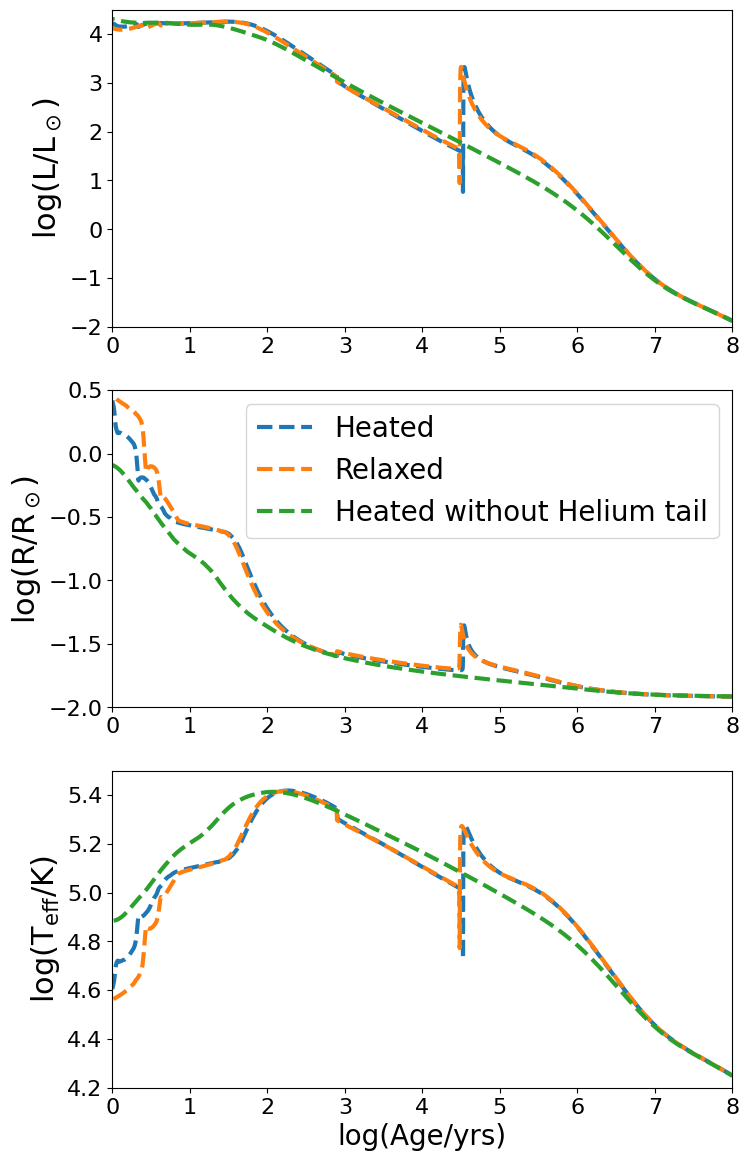

In [12]:

figs, axs=plt.subplots(3,1,figsize=(8,14))
plt.rcParams["lines.linestyle"]="--"

plt.rc('ytick',labelsize=16)
plt.rcParams["lines.linewidth"]=3
plt.rc('xtick',labelsize=16)
#axs[0].plot(np.log10(h.star_age), h.log_L)
#axs[0].plot(np.log10(h2.star_age), h2.log_L)
#axs[0].plot(np.log10(h3.star_age), h3.log_L)

for i in range(1):
    for directory in directory_path:
        h = MesaData(os.path.join(directory, 'history.data'))
        axs[i].plot(np.log10(h.star_age), h.log_L)
        axs[i].set_ylabel("log(L/L$_\odot$)",fontsize=22)
        axs[i+1].plot(np.log10(h.star_age), h.log_R)
        axs[i+1].set_ylabel("log(R/R$_\odot$)",fontsize=22)
        axs[i+2].plot(np.log10(h.star_age), h.log_Teff)
        axs[i+2].set_ylabel("log(T$_{\mathrm{eff}}$/K)",fontsize=22)
        axs[i].set_xlim(0,8)
        axs[i].set_ylim(-2,4.5)
        axs[i+1].set_xlim(0,8)
        axs[i+1].set_ylim(-2,0.5)
        axs[i+2].set_xlim(0,8)
        axs[i+2].set_ylim(4.2,5.5)






plt.xlabel('log(Age/yrs)',fontsize=20)
axs[1].legend(('Heated','Relaxed','Heated without Helium tail'),fontsize=20,loc='best')
plt.savefig("../../Plots/plots_paper/default_evolution_LRT.png",bbox_inches='tight')
plt.savefig("../../Plots/plots_paper/default_evolution_LRT.pdf",bbox_inches='tight')



# Here I plot the  Kiel diagram

1.1
0.95
0.85
0.64
0.5


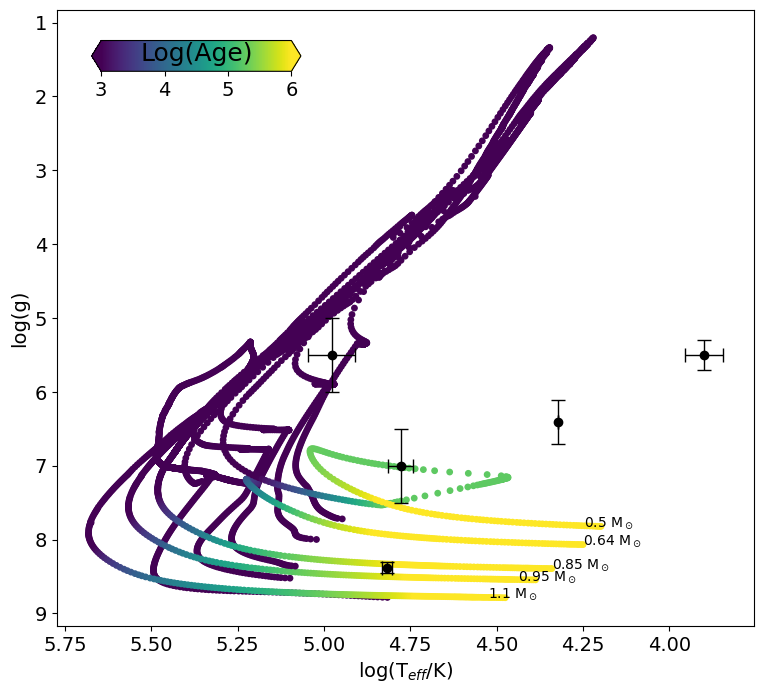

In [20]:

i=0
plt.style.use('default')
#plt.style.use('dark_background')
fig=plt.figure(figsize=(9,8))
plt.rcParams["font.size"]=14
gs = gridspec.GridSpec(1, 1)
ax0 = plt.subplot(gs[0,0])
r=[0.01,0.03,0.1,0.3]
logt=np.linspace(3.75,5.5,20)
colors=('m','g','b','r')
plt.rcParams["lines.linestyle"]="--"
plt.rcParams["lines.linewidth"]=1
for directory in directory_path:
    h = MesaData(os.path.join(directory, 'history.data'))
    mass=h.star_mass[0]
    print(mass)
    plot1=plt.scatter(h.log_Teff, h.log_g,c=np.log10(h.star_age),vmin=3,vmax=6,cmap='viridis',s=15)
    
    if (i>=2 and i<4):
        plt.annotate("{0:.2g} M$_\odot$".format(mass),(h.log_Teff[-1],h.log_g[-1]),rotation=0,fontsize=10)
    elif i==4:
        plt.annotate("{0:.2g} M$_\odot$".format(mass),(h.log_Teff[-1]+0.05,h.log_g[-1]),rotation=0,fontsize=10)

    else: 
        plt.annotate("{0:.2g} M$_\odot$".format(mass),(h.log_Teff[-1]+0.05,h.log_g[-1]),rotation=0,fontsize=10)
    i=i+1
    
logg_d6=np.array([6.41,7.0,5.5,8.38])#J1235, J0927, J0546, J1332
logg_d6_error=np.array([0.3,0.5,0.5,0.08])
temp_d6=np.array([21000,60000,95000,65657])
temp_d6_error=np.array([0,5000,15000,2390])
L_D6=np.square(radii_d6)*(temp_d6/5800)**4
L_D6_error_plus=2*radii_d6_error_plus/radii_d6 + 4*temp_d6_error/temp_d6
L_D6_error_minus=2*radii_d6_error_minus/radii_d6 + 4*temp_d6_error/temp_d6


for i in range(4):
    plt.errorbar(np.log10(temp_d6[i]),logg_d6[i],xerr=temp_d6_error[i]/(np.log(10)*temp_d6[i]),yerr=(logg_d6_error[i]),
                 marker='o',capsize=5,c='black')#

#plt.errorbar(4.32,0.26,yerr=([2*0.030/(0.104*np.log(10))],[0.5/np.log(10)]),marker='o',capsize=5,c='white')#
#plt.errorbar(np.log10(65657),1.99,yerr=([2*0.020/(0.052*np.log(10))],[2*0.025/(0.052*np.log(10))]),marker='o',capsize=5,c='white')
#plt.errorbar(np.log10(95000),2.81,yerr=([2*0.021/(0.051*np.log(10))],[2*0.029/(0.051*np.log(10))]),marker='o',capsize=5,c='white')
#plt.errorbar(np.log10(60000),0.78,yerr=([2*0.007/(0.017*np.log(10))],[2*0.013/(0.017*np.log(10))]),marker='o',capsize=5,c='white')
plt.errorbar(3.9,5.5,xerr=([0.125]/np.log(10)),yerr=0.2,marker='o',capsize=5,c='black') #1-sigma with 8kpm1k Teff and 0.15pm0.05 radius
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
#plt.legend(['0.95','0.85','0.64','J1235','J0927','J0546','J1332','D6(1-3)'],loc="upper right",bbox_to_anchor=(1.0,0.9),fontsize=10)
plt.xlabel('log(T$_{eff}$/K)')
plt.ylabel('log(g)')
'''
for i in range(len(r)):
    logl=2*np.log10(r[i])+4*logt-4*np.log10(5800)
    plt.plot(logt,logl,linestyle=(0,(5,10)),linewidth=1,color='r')
    plt.annotate("R={}".format(r[i]),(logt[1]+0.06,logl[1]-0.3),rotation=-30,fontsize=11)
'''
cbaxes = plt.gca().inset_axes( (0.05,0.9,0.3,0.05)) 
colorbar=plt.colorbar(plot1,extend='both',orientation='horizontal',cax=cbaxes)
colorbar.set_label(label='Log(Age)',labelpad=-42,fontsize=18)  # Adjust the value of 'labelpad' as needed



1.1
0.95
0.85
0.64
0.5


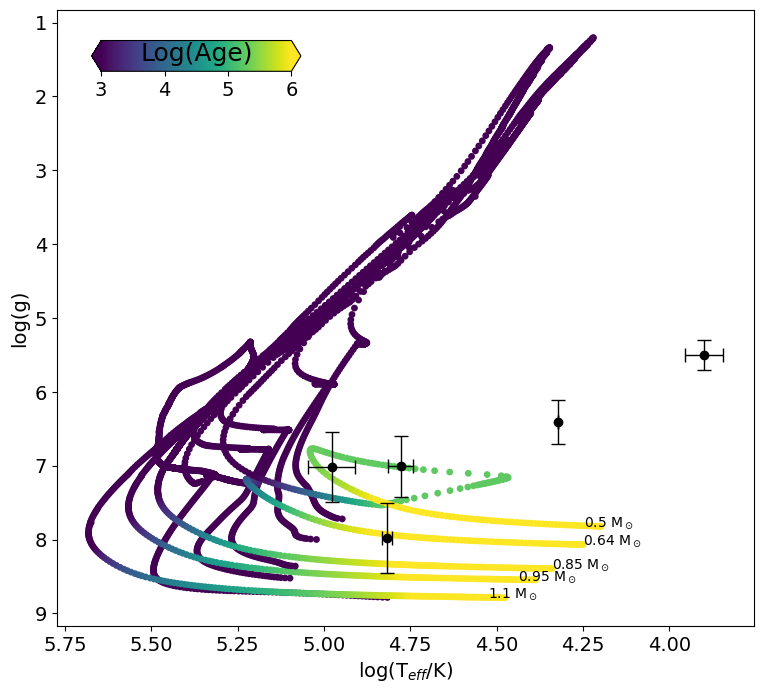

In [21]:

i=0
plt.style.use('default')
#plt.style.use('dark_background')
fig=plt.figure(figsize=(9,8))
plt.rcParams["font.size"]=14
gs = gridspec.GridSpec(1, 1)
ax0 = plt.subplot(gs[0,0])
r=[0.01,0.03,0.1,0.3]
logt=np.linspace(3.75,5.5,20)
colors=('m','g','b','r')
plt.rcParams["lines.linestyle"]="--"
plt.rcParams["lines.linewidth"]=1
for directory in directory_path:
    h = MesaData(os.path.join(directory, 'history.data'))
    mass=h.star_mass[0]
    print(mass)
    plot1=plt.scatter(h.log_Teff, h.log_g,c=np.log10(h.star_age),vmin=3,vmax=6,cmap='viridis',s=15)
    
    if (i>=2 and i<4):
        plt.annotate("{0:.2g} M$_\odot$".format(mass),(h.log_Teff[-1],h.log_g[-1]),rotation=0,fontsize=10)
    elif i==4:
        plt.annotate("{0:.2g} M$_\odot$".format(mass),(h.log_Teff[-1]+0.05,h.log_g[-1]),rotation=0,fontsize=10)

    else: 
        plt.annotate("{0:.2g} M$_\odot$".format(mass),(h.log_Teff[-1]+0.05,h.log_g[-1]),rotation=0,fontsize=10)
    i=i+1
    
logg_d6=np.array([6.41,7.01,7.02,7.98])#J1235, J0927, J0546, J1332
logg_d6_error=np.array([0.3,0.41,0.47,0.47])
temp_d6=np.array([21000,60000,95000,65657])
temp_d6_error=np.array([0,5000,15000,2390])
L_D6=np.square(radii_d6)*(temp_d6/5800)**4
L_D6_error_plus=2*radii_d6_error_plus/radii_d6 + 4*temp_d6_error/temp_d6
L_D6_error_minus=2*radii_d6_error_minus/radii_d6 + 4*temp_d6_error/temp_d6


for i in range(4):
    plt.errorbar(np.log10(temp_d6[i]),logg_d6[i],xerr=temp_d6_error[i]/(np.log(10)*temp_d6[i]),yerr=(logg_d6_error[i]),
                 marker='o',capsize=5,c='black')#

#plt.errorbar(4.32,0.26,yerr=([2*0.030/(0.104*np.log(10))],[0.5/np.log(10)]),marker='o',capsize=5,c='white')#
#plt.errorbar(np.log10(65657),1.99,yerr=([2*0.020/(0.052*np.log(10))],[2*0.025/(0.052*np.log(10))]),marker='o',capsize=5,c='white')
#plt.errorbar(np.log10(95000),2.81,yerr=([2*0.021/(0.051*np.log(10))],[2*0.029/(0.051*np.log(10))]),marker='o',capsize=5,c='white')
#plt.errorbar(np.log10(60000),0.78,yerr=([2*0.007/(0.017*np.log(10))],[2*0.013/(0.017*np.log(10))]),marker='o',capsize=5,c='white')
plt.errorbar(3.9,5.5,xerr=([0.125]/np.log(10)),yerr=0.2,marker='o',capsize=5,c='black') #1-sigma with 8kpm1k Teff and 0.15pm0.05 radius
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
#plt.legend(['0.95','0.85','0.64','J1235','J0927','J0546','J1332','D6(1-3)'],loc="upper right",bbox_to_anchor=(1.0,0.9),fontsize=10)
plt.xlabel('log(T$_{eff}$/K)')
plt.ylabel('log(g)')
'''
for i in range(len(r)):
    logl=2*np.log10(r[i])+4*logt-4*np.log10(5800)
    plt.plot(logt,logl,linestyle=(0,(5,10)),linewidth=1,color='r')
    plt.annotate("R={}".format(r[i]),(logt[1]+0.06,logl[1]-0.3),rotation=-30,fontsize=11)
'''
cbaxes = plt.gca().inset_axes( (0.05,0.9,0.3,0.05)) 
colorbar=plt.colorbar(plot1,extend='both',orientation='horizontal',cax=cbaxes)
colorbar.set_label(label='Log(Age)',labelpad=-42,fontsize=18)  # Adjust the value of 'labelpad' as needed



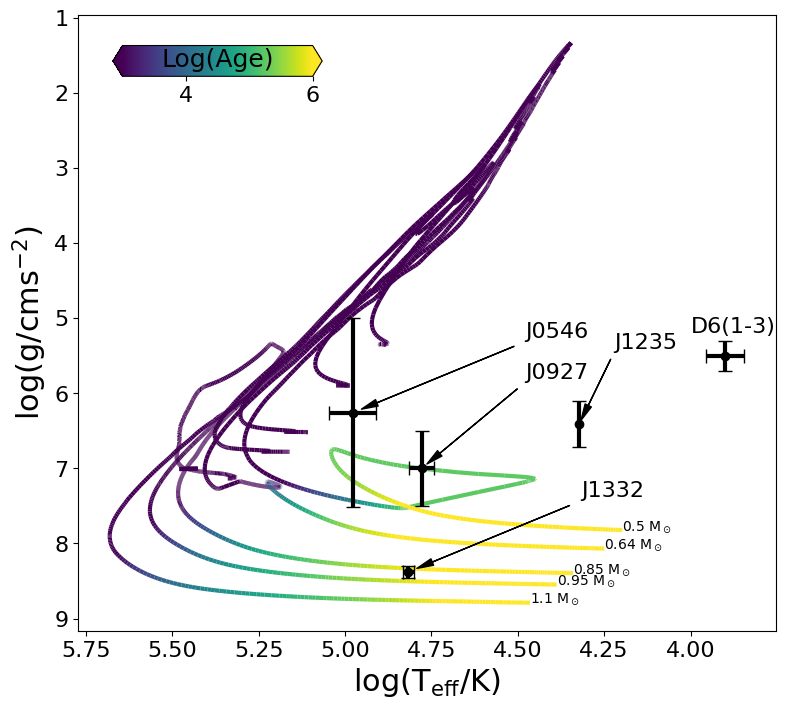

In [12]:

i=0
fig,ax=plt.subplots(figsize=(9,8))
plt.rcParams["font.size"]=16
plt.rcParams["axes.labelsize"]=22
#gs = gridspec.GridSpec(1, 1)
#ax0 = plt.subplot(gs[0,0])
r=[0.01,0.03,0.1,0.3]
logt=np.linspace(3.75,5.5,20)
colors=('m','g','b','r')
#plt.rcParams["lines.linestyle"]="--"
plt.rcParams["lines.linewidth"]=3
for directory in directory_path:
    h = MesaData(os.path.join(directory, 'history.data'))
    mass=h.star_mass[0]
    mask=h.star_age>=3.2e-10
    #plot1=plt.scatter(h.log_Teff[mask], h.log_g[mask],c=np.log10(h.star_age[mask]),vmin=4,vmax=6,cmap='viridis',s=15)
    points = np.array([h.log_Teff[mask], h.log_g[mask]]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    lc = LineCollection(segments, cmap='viridis')
    lc.set_array(np.log10(h.star_age[mask]))

    lc.set_linewidth(3)
    line = ax.add_collection(lc)
    lc.set(clim=(3,6))
    if (i>=2 and i<4):
        plt.annotate("{0:.2g} M$_\odot$".format(mass),(h.log_Teff[-1],h.log_g[-1]),rotation=0,fontsize=10)
    elif i==4:
        plt.annotate("{0:.2g} M$_\odot$".format(mass),(h.log_Teff[-1],h.log_g[-1]),rotation=0,fontsize=10)

    else: 
        plt.annotate("{0:.2g} M$_\odot$".format(mass),(h.log_Teff[-1],h.log_g[-1]),rotation=0,fontsize=10)
    i=i+1
    
logg_d6=np.array([6.41,7.0,6.26,8.38])#J1235, J0927, J0546, J1332
logg_d6_error=np.array([0.3,0.5,1.26,0.08])
temp_d6=np.array([21000,60000,95000,65657])
temp_d6_error=np.array([0,5000,15000,2390])
L_D6=np.square(radii_d6)*(temp_d6/5800)**4
L_D6_error_plus=2*radii_d6_error_plus/radii_d6 + 4*temp_d6_error/temp_d6
L_D6_error_minus=2*radii_d6_error_minus/radii_d6 + 4*temp_d6_error/temp_d6


for i in range(4):
    plt.errorbar(np.log10(temp_d6[i]),logg_d6[i],xerr=temp_d6_error[i]/(np.log(10)*temp_d6[i]),yerr=(logg_d6_error[i]),
                 marker='o',capsize=5,c='black')#


plt.errorbar(3.9,5.5,xerr=([0.125]/np.log(10)),yerr=0.2,marker='o',capsize=5,c='black') #1-sigma with 8kpm1k Teff and 0.15pm0.05 radius
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.xlabel('log(T$_\mathrm{eff}$/K)')
plt.ylabel('log(g/cms$^{-2}$)')
plt.annotate('J0546', xy=(np.log10(temp_d6[2]), logg_d6[2]), xytext=(np.log10(temp_d6[2])-0.5, logg_d6[2]-1),
            arrowprops=dict(facecolor='black', shrink=0.05,width=0.001,headwidth=5)
            )
plt.annotate('J1332', xy=(np.log10(temp_d6[3]), logg_d6[3]), xytext=(np.log10(temp_d6[3])-0.5, logg_d6[3]-1),
            arrowprops=dict(facecolor='black', shrink=0.05,width=0.001,headwidth=5)
            )
plt.annotate('J0927', xy=(np.log10(temp_d6[1]), logg_d6[1]), xytext=(np.log10(temp_d6[1])-0.3, logg_d6[1]-1.2),
            arrowprops=dict(facecolor='black', shrink=0.05,width=0.001,headwidth=5)
            )
plt.annotate('J1235', xy=(np.log10(temp_d6[0]), logg_d6[0]), xytext=(np.log10(temp_d6[0])-0.1, logg_d6[0]-1),
            arrowprops=dict(facecolor='black', shrink=0.05,width=0.001,headwidth=5)
            )
plt.annotate('D6(1-3)', xy=(3.9,5.5), xytext=(4,5.2)
            
            )
cbaxes = plt.gca().inset_axes( (0.05,0.9,0.3,0.05)) 
colorbar=fig.colorbar(line,ax=ax,extend='both',orientation='horizontal',cax=cbaxes)
colorbar.set_label(label='Log(Age)',labelpad=-42,fontsize=18)  # Adjust the value of 'labelpad' as needed
plt.savefig("../../Plots/plots_paper/kiel_grid1.png",bbox_inches='tight')
plt.savefig("../../Plots/plots_paper/kiel_grid1.pdf",bbox_inches='tight')


(0.0, 8.0)

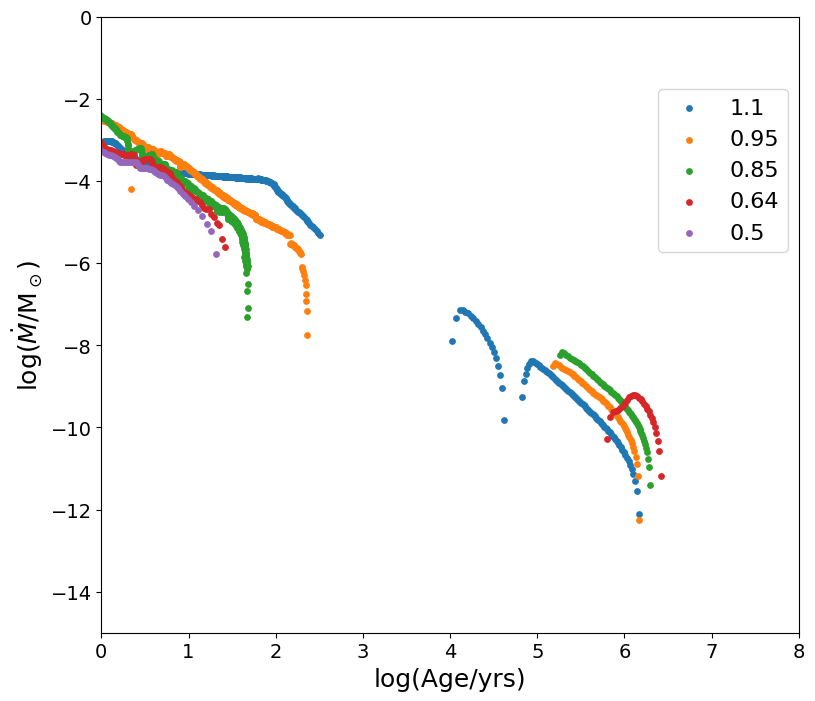

In [15]:
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

i=0
plt.style.use('default')
#plt.style.use('dark_background')
fig=plt.figure(figsize=(9,8))
plt.rcParams["font.size"]=14
plt.rcParams["axes.labelsize"]=18

gs = gridspec.GridSpec(1, 1)
ax0 = plt.subplot(gs[0,0])
r=[0.01,0.03,0.1,0.3]
logt=np.linspace(3.75,5.5,20)
colors=('m','g','b','r')
plt.rcParams["lines.linestyle"]="--"
plt.rcParams["lines.linewidth"]=1
mass=[]
for directory in directory_path:
    h = MesaData(os.path.join(directory, 'history.data'))
    mass.append(h.star_mass[0])
    #h2 = MesaData(os.path.join(directory_path6, 'history.data'))
#h2 = MesaData(os.path.join(directory_path6, 'history.data'))
    plot1=plt.scatter(np.log10(h.star_age), h.log_abs_mdot,s=15)
    '''
    if (i>=2 and i<4):
        plt.annotate("{0:.2g} M$_\odot$".format(mass),(h.log_Teff[-1],h.log_L[-1]-0.7),rotation=-40,fontsize=10)
    elif i==4:
        plt.annotate("{0:.2g} M$_\odot$".format(mass),(h.log_Teff[-1]-0.05,h.log_L[-1]-0.7),rotation=-40,fontsize=10)

    else: 
        plt.annotate("{0:.2g} M$_\odot$".format(mass),(h.log_Teff[-1]+0.05,h.log_L[-1]-0.8),rotation=-40,fontsize=10)
    i=i+1
    '''



plt.legend(mass,loc="best",bbox_to_anchor=(1.0,0.9),fontsize=16)
plt.xlabel('log(Age/yrs)')
plt.ylabel('log($\dot{M}$/M$_\odot$)')

plt.ylim(-15,0)
plt.xlim(0,8)
#plt.savefig("../../../D6_MESA/Plots/plots_paper/HR_grid1.pdf",bbox_inches='tight')
#plt.savefig("../../../D6_MESA/Plots/plots_paper/HR_grid1.png")

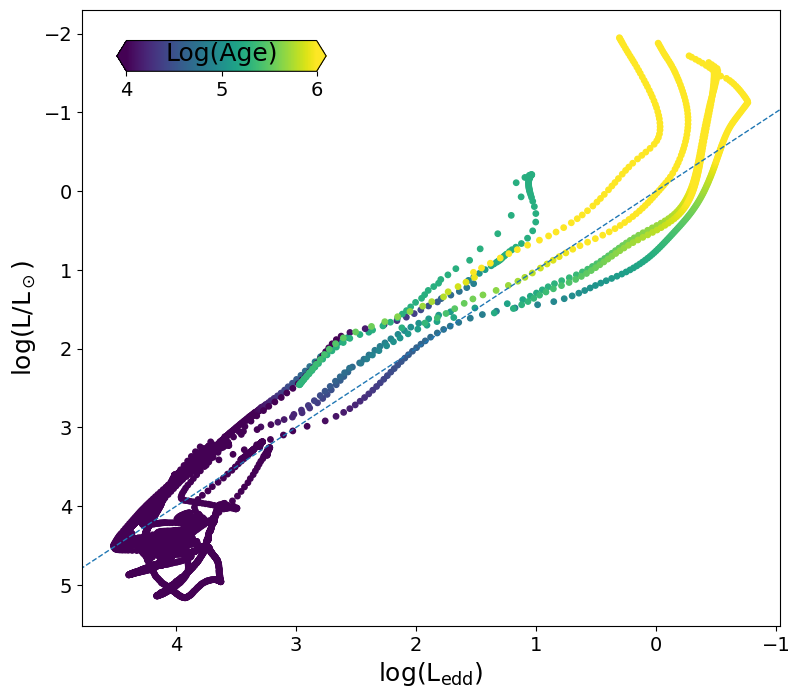

In [17]:
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

i=0
plt.style.use('default')
#plt.style.use('dark_background')
fig=plt.figure(figsize=(9,8))
plt.rcParams["font.size"]=14
plt.rcParams["axes.labelsize"]=18

gs = gridspec.GridSpec(1, 1)
ax0 = plt.subplot(gs[0,0])
r=[0.01,0.03,0.1,0.3]
logt=np.linspace(3.75,5.5,20)
colors=('m','g','b','r')
plt.rcParams["lines.linestyle"]="--"
plt.rcParams["lines.linewidth"]=1
mass=[]
for directory in directory_path:
    h = MesaData(os.path.join(directory, 'history.data'))
    mass.append(h.star_mass[0])
    mask=h.star_age>=3.2e-10

    
    plot1=plt.scatter( h.log_Ledd[mask],(h.log_L[mask]),s=15,c=np.log10(h.star_age[mask]),vmin=4,vmax=6,cmap='viridis')
    '''
    if (i>=2 and i<4):
        plt.annotate("{0:.2g} M$_\odot$".format(mass),(h.log_Teff[-1],h.log_L[-1]-0.7),rotation=-40,fontsize=10)
    elif i==4:
        plt.annotate("{0:.2g} M$_\odot$".format(mass),(h.log_Teff[-1]-0.05,h.log_L[-1]-0.7),rotation=-40,fontsize=10)

    else: 
        plt.annotate("{0:.2g} M$_\odot$".format(mass),(h.log_Teff[-1]+0.05,h.log_L[-1]-0.8),rotation=-40,fontsize=10)
    i=i+1
    '''

plt.axline((0,0),slope=1)
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
#plt.legend(mass,loc="best",bbox_to_anchor=(1.0,0.9),fontsize=16)
plt.ylabel('log(L/L$_\odot$)')
plt.xlabel('log(L$_\mathrm{edd}$)')
cbaxes = plt.gca().inset_axes( (0.05,0.9,0.3,0.05)) 
colorbar=plt.colorbar(plot1,extend='both',orientation='horizontal',cax=cbaxes)
colorbar.set_label(label='Log(Age)',labelpad=-42,fontsize=18)
#plt.ylim(-15,0)
#plt.xlim(0,8)
#plt.savefig("../../../D6_MESA/Plots/plots_paper/HR_grid1.pdf",bbox_inches='tight')
#plt.savefig("../../../D6_MESA/Plots/plots_paper/HR_grid1.png")

In [ ]:
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

i=0
plt.style.use('default')
#plt.style.use('dark_background')
fig=plt.figure(figsize=(9,8))
plt.rcParams["font.size"]=14
plt.rcParams["axes.labelsize"]=18

gs = gridspec.GridSpec(1, 1)
ax0 = plt.subplot(gs[0,0])
r=[0.01,0.03,0.1,0.3]
logt=np.linspace(3.75,5.5,20)
colors=('m','g','b','r')
plt.rcParams["lines.linestyle"]="--"
plt.rcParams["lines.linewidth"]=1
mass=[]
for directory in directory_path:
    h = MesaData(os.path.join(directory, 'history.data'))
    mass.append(h.star_mass[0])
    #h2 = MesaData(os.path.join(directory_path6, 'history.data'))
#h2 = MesaData(os.path.join(directory_path6, 'history.data'))
    plot1=plt.scatter((h.log_L), h.log_Ledd,s=15)
    '''
    if (i>=2 and i<4):
        plt.annotate("{0:.2g} M$_\odot$".format(mass),(h.log_Teff[-1],h.log_L[-1]-0.7),rotation=-40,fontsize=10)
    elif i==4:
        plt.annotate("{0:.2g} M$_\odot$".format(mass),(h.log_Teff[-1]-0.05,h.log_L[-1]-0.7),rotation=-40,fontsize=10)

    else: 
        plt.annotate("{0:.2g} M$_\odot$".format(mass),(h.log_Teff[-1]+0.05,h.log_L[-1]-0.8),rotation=-40,fontsize=10)
    i=i+1
    '''

plt.axline((0,0),slope=1)

plt.legend(mass,loc="best",bbox_to_anchor=(1.0,0.9),fontsize=16)
plt.xlabel('log(L/L$_\odot$)')
plt.ylabel('log(L$_\mathrm{edd}$)')

#plt.ylim(-15,0)
#plt.xlim(0,8)
#plt.savefig("../../../D6_MESA/Plots/plots_paper/HR_grid1.pdf",bbox_inches='tight')
#plt.savefig("../../../D6_MESA/Plots/plots_paper/HR_grid1.png")